all items have to insert in graph




[{'parent': 'read_home_timeline_server', 'span': 'read_home_timeline_redis_find_client', 'service_id': 'p1', 'length': 117}, {'parent': 'read_home_timeline_client', 'span': 'read_home_timeline_server', 'service_id': 'p1', 'length': 117}, {'parent': '/wrk2-api/home-timeline/read', 'span': 'read_home_timeline_client', 'service_id': 'p2', 'length': 117}, {'parent': '/wrk2-api/home-timeline/read', 'span': '/wrk2-api/home-timeline/read', 'service_id': 'p2', 'length': 117}, {'parent': 0, 'span': '/wrk2-api/home-timeline/read', 'service_id': 'p2', 'length': 117}, {'parent': 'read_home_timeline_server', 'span': 'post_storage_read_posts_server', 'service_id': 'p3', 'length': 117}, {'parent': '/wrk2-api/user-timeline/read', 'span': 'ReadUserTimeline', 'service_id': 'p1', 'length': 64}, {'parent': '/wrk2-api/user-timeline/read', 'span': '/wrk2-api/user-timeline/read', 'service_id': 'p1', 'length': 64}, {'parent': 0, 'span': '/wrk2-api/user-timeline/read', 'se

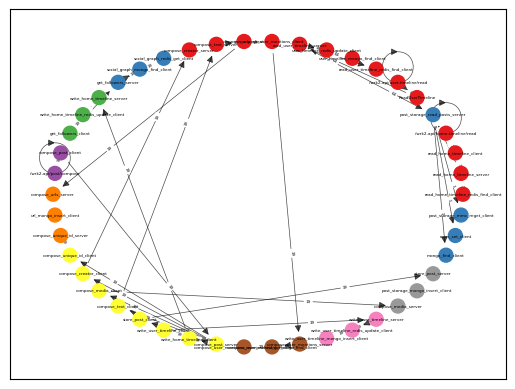

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import random

# read data from file
f=open('/content/trace-200-request.json')

dataTrace = json.load(f)
list_tracing = dataTrace['data']

list_spans= []
process = set()
numberRequests = 1
for item in list_tracing:
  spans= item['spans']
  list_operaionName_spanID=[]
  for spanItem in spans:
    process.add(spanItem['processID'])
    list_operaionName_spanID.append(
        {
            'spanID':spanItem['spanID'],
            'operationName':spanItem['operationName']
        }
    )

  for spanItem in spans:
    references = spanItem['references']
    parentName = 0
    if (len(references)!=0):
      parentId = references[0]['spanID']
      for spanIDNAME in list_operaionName_spanID:
        if spanIDNAME['spanID']==parentId:
          parentName = spanIDNAME['operationName']


    for item in list_spans:
        if item['parent'] == parentName and item['span'] == spanItem['operationName']:
            item['length'] += 1
            break
    else:
        list_spans.append(
        {
            'parent':parentName,
            'span':spanItem['operationName'],
            'service_id':spanItem['processID'],
            'length':1
        }
    )

print('all items have to insert in graph')
print('\n\n\n')
print(list_spans)



G = nx.DiGraph()

for row in list_spans:
  characters_to_remove ='p'
  serviceNumber = row['service_id']
  for char in characters_to_remove:
    serviceNumber = serviceNumber.replace(char, "")
  G.add_node(row['span'],label=row['span'],service_id=int(serviceNumber))


for row in list_spans:
  if row['parent']!=0:
    G.add_edge(row['parent'],row['span'],length=row['length'])
# G.add_node('A', label='Node A', service_id=1)
# G.add_node('B', label='Node B', service_id=2)
# G.add_node('C', label='Node C', service_id=2)
# G.add_node('E', label='Node E', service_id=4)
# G.add_edge('A', 'B', length=2)
# G.add_edge('B', 'A', length=3)
# G.add_edge('C', 'A', length=3)

pos = nx.circular_layout(G)  # Circular layout
# nx.draw(G, pos, with_labels=False,font_size=3,node_size=100)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)

# Draw nodes with different colors based on service_id
node_colors = [data['service_id'] for _, data in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1, node_size=100)



# Draw custom node labels
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=3, font_color='black')

edge_labels = {(u, v): d['length'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=3)
plt.savefig("graph_image.svg", format="svg", dpi=300)
plt.show()



# New Section